In [3]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np

duluth_lat = 46.7867
duluth_lon = 92.1005 + 180

In [4]:
A_poles = pd.read_excel('Data/Laurentia_poles_Precambrian.xlsx')

# The Precambrian paleogeography of Laurentia

*Nicholas Swanson-Hysell$^1$*

$^1$Department of Earth and Planetary Science, University of California, Berkeley

*This notebook contains the text, table and figures for a manuscript of a chapter for the book “Ancient Supercontinents and the Paleogeography of the Earth.”*

## Introduction

Laurentia was a major continent throughout the majority of the Proterozoic and is hypothesized to have been a constituent of both the Paleoproterozoic Nuna and Neoproterozoic Rodinia supercontinents. The paleogeographic position of Laurentia is key to the development of reconstructions of Proterozoic paleogeography. There is a rich record of Precambrian paleomagnetic poles from Laurentia that is key to evaluating and developing paleogeographic models.

Laurentia refers to the craton that forms the Precambrian core of North America. Laurentia is comprised of multiple Archean cratons that had unique histories prior to their amalgmation in the Paleoproterozoic, as well as tectonic zones of crustal growth that post-date this assembly (Hoffman, 1988). Collision between the Superior Craton and the composite Slave+Rae+Hearne+Nain cratons that resulted in the the Trans-Hudson orogeny represents a major event in the formation of Laurentia (Corrigan et al., 2009). Terminal collison recorded in the Trans-Hudson orogeny is estimated to have been ca. 1.86 to 1.82 Ga based on constraints such as U-Pb dating of monazite grains and zircon rims (Skipton et al., 2016; Weller and St-Onge, 2017). A period of accretionary and collision orogenesis is recorded in the constituent cratons and terranes of Laurentia leading up to the terminal collison of the Trans-Hudson orogeny. This story of rapid Paleoproterozoic amalgamation of  Laurentia's constituent cratons, including the terminal Trans-Hudson orogeny, was synthesized in the seminal paper *United Plates of America* (Hoffman, 1988) and has been refined in the time since -- particularly with additional geochronological constraints. Of most relevance here, are the events that led to the suturing of the more major cratonic blocks: the Thelon orogeny associated with the collision between the Slave craton and the Rae craton ca. 2.0 to 1.9 Ga (Hoffman, 1988); the Snowbird orogeny associated with ca. 1.89 Ga collision between the Rae and Hearne cratons and associated terranes (Berman et al., 2007); the Nagssugtoqidian orogeny associated with ca. 1.86 Ga collision between the Rae and Nain cratons (St-Onge et al., 2009). As for the Wyoming craton, many models posit that it was conjoined with Hearne and associated cratons as the time of the Trans-Hudson orogeny (e.g. St-Onge et al., 2009; Pehrsson et al., 2015) although a contrasting view has been been proposed that it arrived ca. 1.72 Ga after the accretionary Yavapai and Penokean orogenies (Kilian et al. 2016).  

In the paleogeographic model framework of Pehrsson et al. (2015), the cratonic and terrane collisions leading up to the Trans-Hudson orogeny mark the initial phase of assembly of the supercontinent Nuna. The Trans-Hudson orogeny itself is taken to be the terminal collision associated with the closure of the Manikewan Ocean that had previous been a large oceanic tract separating the Superior craton from the composite Slave+Rae+Hearne+Nain cratons (often referred to as the Churchill domain or plate; e.g. Skipton et al., 2016; Weller and St-Onge, 2017). This model posits that this period terminal collision is not only associated with the amalgmation of Laurentia, but is also associated with the assembly of the supercontinent Nuna that including other major Paleoproterozoic cratons including Siberia, Congo/Sao Francisco, West Africa, and Amazonia (Pehrsson et al., 2015). Following the Trans-Hudson orogeny, the locus of orogenesis migrated to the exterior of Laurentia. This change marks a change in the style of Laurentia's growth as subsequent growth proceeding dominantly through accretion of juvenile crust along the southern and eastern margin of the nucleus of Archean cratons (Whitmeyer and Karlstrom, 2007; Fig. 1). 

The perphiral Penokean orogeny on the southern margin of the Superior craton coincided with the Trans-Hudson orogeny with the last evidence of the orogeny being undeformed plutons such as the ca. 1.78 Ga East Central Minnesota Batholith (Holm et al., 2005). The arc-continent collision of the ca. 1.71 to 1.68 Ga Yavapai orogeny 

## Figure 1

*Notes relevant to the construction of the figure: 
The Whitmeyer and Karlstom (2007) tectonic model for the growth of Laurentia has the following units which are defined in the shapefile. For our simplified representation, we will break these into 3 main categories: 1a) Archean cratons, 1b) reworked Archean crust, 2) Paleoproterozoic terranes 3) Mesoproterozoic terranes.*

- < 0.78 Ga Windermere Supergroup 
- '> 2.5 Ga Archean crust' | 1a
- 1.2 - 1.1 Ga Midcontinent rift system | 3
- 1.3 - 0.95 Ga granitoids | 3
- 1.3 - 1.0 Ga collisional orogens | 3
- 1.45 - 1.35 Ga granitoids | 3
- 1.55 - 1.35 Ga juvenile crust | 3
- 1.65 - 1.60 Ga granitoids | 2
- 1.69 - 1.65 Ga juvenile crust | 2
- 1.72 - 1.68 Ga granitoids | 2
- 1.76 - 1.72 Ga juvenile crust | 2
- 1.80 - 1.76 Ga juvenile arcs | 2
- 1.9 - 1.8 Ga reworked Archean crust | 1b
- 2.0 - 1.8 Ga juvenile arcs | 2
- 2.0 - 1.8 Ga juvenile orogens | 2
- 2.5 - 2.0 Ga miogeoclinal sediments | 1a
- approx 1.70 Ga quartzite deposits | 2
- approx. 1.65 Ga quartzite deposits | 2
- Basin | lightyellow
- Eastern rift basins | not plotted

TypeError: __init__() got an unexpected keyword argument 'fontsize'

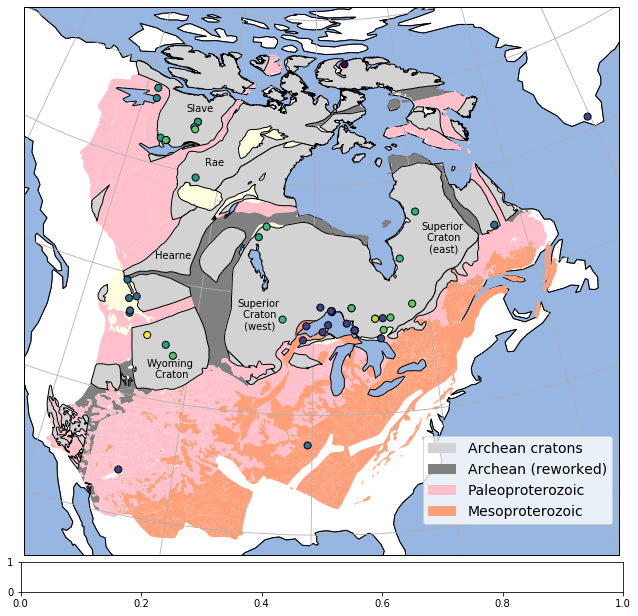

In [46]:
central_lat = duluth_lat
central_lon = duluth_lon
extent = [duluth_lon-30, duluth_lon+28, duluth_lat-22, duluth_lat+32]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, facecolor='white',edgecolor='black')

shpfilename = './Data/Whitmeyer2007_GIS/CEUS_pc_Whitmeyer2007_R0.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=99)
        
Archean = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightgrey")
Reworked_Archean = mpatches.Rectangle((0, 0), 1, 1, facecolor="grey")
Paleoprot = mpatches.Rectangle((0, 0), 1, 1, facecolor="pink")
Mesoprot = mpatches.Rectangle((0, 0), 1, 1, facecolor="LightSalmon")
labels = ['Archean cratons',
          'Archean (reworked)',
          'Paleoproterozoic',
          'Mesoproterozoic']
plt.legend([Archean, Reworked_Archean,Paleoprot,Mesoprot], labels, loc='upper right',
           bbox_to_anchor=(1,0.23), fancybox=True, fontsize = 14)

ax.gridlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
pole_locales = ax.scatter(A_poles.SLONG.tolist(), A_poles.SLAT.tolist(),
           c=A_poles['nominal age'].tolist(),
           edgecolors='black', s=50,
           transform=ccrs.Geodetic(),zorder=100)

plt.text(-97, 47, 'Superior\n Craton\n (west)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-72, 53, 'Superior\n Craton\n (east)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-107,42, 'Wyoming\n Craton',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-109.5,52, 'Hearne',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-106,61, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110,66, 'Slave',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.colorbar(pole_locales,orientation='horizontal',pad=0.01,shrink=0.9,label='pole age (Ma)', fontsize = 14)
plt.savefig('Fig1_map.pdf')
plt.show()

Figure 1. Simplified map of Laurentia showing the location of Archean cratons and younger Paleoproterozoic and Mesoproterozoic crust (simplified from Whitmeyer and Karlstrom, 2007). The localities from which the compiled Precambrian paleomagnetic poles were developed are shown and colored by age.

## Paleomagnetic pole compilation

This chapter utilizes the compilation of paleomagnetic poles developed through the Nordic Paleomagnetism Workshops with some additions and modifications. The Nordic Paleomagnetism Workshops have taken the approach of using expert panels to assess paleomagnetic poles and assign them with grades meant to convey the confidence that the community has in these results. While many factors associated with paleomagnetic poles can be assessed quantitatively such as the Fisher statistics and the precision of geochronological constraints, other aspects such as the degree to which available field tests constrain the magnetization to be primary require expert assessment. The categorizations used by the expert panel are A and B. An A rating refers to poles that are judged to be of such high-quality that they provide essential constraints that should be satisfied in paleogeographic reconstructions. A B rating is associated with poles that are judged to likely provide a high-quality constraint, but have some deficiency such as remaining ambiguity in the demonstration of primary remanence or the quality/precision of available geochronologic constraints.

Prior to the termination of the Trans-Hudson orogeny orogeny (before 1.8 Ga), we consider paleomagnetic poles with respect to the individual Archean cratons. Following the termination of this orogeny (after 1.8 Ga), we consider poles from all the respective cratons and terranes to reflect the position of all of Laurentia.

For the Superior craton, an additional complexity is that Evans and Halls (2010) put forth an argument based on paleomagnetic poles from Siderian to Rhyacian Period (2.50 to 2.05 Ga) dike swarms that there as substantial Paleoproterozoic rotation of the western Superior craton relative to the eastern Superior craton across the Kapuskasing Structural Zone. They propose a Euler rotation of (51º N, 85º W, −14º CCW) to reconstruct western Superior relative to eastern Superior that occured in the time interval of 2.07 to 1.87 Ga. I follow this interpretation and group the poles into Superior (West) and Superior (East). These poles are shown in Table 1 both in their initial reference frame and rotated into the other Superior reference frame.

In [29]:
#print(tabulate(A_poles, headers='keys', tablefmt='pipe'))

|pole| CRATON                   | ROCKNAME                                            | GPMDB-result#   |   SLAT |   SLONG |   PLAT |   PLONG |      A95 |   1 |   2 |   3 | 4   |   5 |   6 |   7 |   Q(7) |   nominal age |   min |   max | POLE AUTHORS                                | YEAR   | Nordic_Grade   |
|---:|:-------------------------|:----------------------------------------------------|:----------------|-------:|--------:|-------:|--------:|---------:|----:|----:|----:|:----|----:|----:|----:|-------:|--------------:|------:|------:|:--------------------------------------------|:-------|:---------------|
|  0 | Laurentia                | Franklin LIP grand mean                             | MEAN            |  73    |  275.4  |    6.7 |   162.1 |  3       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |         724   |   721 |   727 | Denyszyn et al.                             | 2009   | A              |
|  1 | Laurentia                | Michipicoten Island Fm                              | NEW             |  47.7  |  274.3  |   17   |   174.7 |  4.4     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        1084   |  1083 |  1085 | Fairchild et al.                            | 2017   | A              |
|  2 | Laurentia                | Lake Shore Traps                                    | 9506            |  47.6  |  271.9  |   23.1 |   186.4 |  4       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1087   |  1085 |  1089 | Kulakov et al.                              | 2013   | A              |
|  3 | Laurentia                | Central Arizona diabases -N                         | NEW             |  33.7  |  249.2  |   15.7 |   175.3 |  7.00999 |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1088   |  1077 |  1099 | Donadini et al.                             | 2011   | A              |
|  4 | Laurentia                | Schroeder Lutsen Basalts                            | NEW             |  47.5  |  269.1  |   27.1 |   187.8 |  3       |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1090   |  1083 |  1092 | Fairchild et al.                            | 2017   | A              |
|  5 | Laurentia                | Portage Lake Volcanics                              | 9507            |  47    |  271.2  |   26.7 |   178   |  4.69574 |   1 |   1 |   1 | fG  |   1 |   0 |   1 |      6 |        1095   |  1092 |  1098 | Hnat et al.                                 | 2006   | A              |
|  6 | Laurentia                | North Shore lavas -N                                | NEW             |  46.3  |  268.7  |   34.5 |   181.3 |  2.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1097   |  1094 |  1100 | Tauxe & Kodama                              | 2009   | A              |
|  7 | Laurentia                | Uppermost Mamainse Point volcanics -N               | NEW             |  47.1  |  275.3  |   31.2 |   183.2 |  2.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1098   |  1095 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  8 | Laurentia                | Mamainse Point volcanics (lower N, upper R)         | 9512            |  47.1  |  275.3  |   36.1 |   189.7 |  4.9     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1100.5 |  1100 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  9 | Laurentia                | Lower Mamainse Point volcanics -R2                  | 9511            |  47.1  |  275.3  |   37.5 |   205.2 |  4.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014a  | A              |
| 10 | Laurentia                | Upper Osler volcanics -R                            | 9514            |  48.7  |  272.4  |   42.5 |   201.6 |  3.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014b  | A              |
| 11 | Laurentia                | Middle Osler volcanics -R                           | NEW             |  48.8  |  272.4  |   42.7 |   211.3 |  8.2     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1106.5 |  1103 |  1110 | Swanson-Hysell et al.                       | 2014b  | A              |
| 12 | Laurentia                | Lowermost Mamainse Point volcanics -R1              | 9510            |  47.1  |  275.3  |   49.5 |   227   |  5.3     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014a  | A              |
| 13 | Laurentia                | Lower Osler volcanics -R                            | 9515            |  48.8  |  272.3  |   40.9 |   218.6 |  4.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014b  | A              |
| 14 | Laurentia                | MEAN Nipigon sills and lavas                        | MEAN            |  49.1  |  270.9  |   47.2 |   217.8 |  4       |   1 |   1 |   1 | c   |   1 |   0 |   1 |      6 |        1111   |  1107 |  1115 | LULEÅ WORKING GROUP                         | 2009   | A              |
| 15 | Laurentia                | Abitibi Dykes                                       | 7193            |  48    |  279    |   48.8 |   215.5 | 14.1     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1141   |  1139 |  1143 | Ernst & Buchan                              | 1993   | A              |
| 16 | Laurentia                | Sudbury Dykes Combined                              | 2175            |  46.3  |  278.6  |   -2.5 |   192.8 |  2.5     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1237   |  1232 |  1242 | Palmer et al. (age: Dudás et al. 1994)      | 1977   | A              |
| 17 | Laurentia                | Mackenzie dykes grand mean                          | MEAN            |  65    |  250    |    4   |   190   |  5       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1267   |  1265 |  1269 | Buchan et al.                               | 2000   | A              |
| 18 | Laurentia                | Pilcher, Garnet Range and Libby Fms                 | 9030            |  46.7  |  246.4  |  -19.2 |   215.3 |  7.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1384.5 |  1362 |  1407 | Elston et al.                               | 2002   | A              |
| 19 | Laurentia                | McNamara Formation                                  | 9031            |  46.9  |  246.4  |  -13.5 |   208.3 |  6.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1401   |  1395 |  1407 | Elston et al.                               | 2002   | A              |
| 20 | Laurentia                | Purcell Lava                                        | 9037            |  49.4  |  245.1  |  -23.6 |   215.6 |  4.8     |   1 |   1 |   1 | f   |   1 |   0 |   0 |      5 |        1443   |  1436 |  1450 | Elston et al.                               | 2002   | A              |
| 21 | Laurentia                | Snowslip Formation                                  | 9038            |  47.9  |  245.9  |  -24.9 |   210.2 |  3.5     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1449.5 |  1436 |  1463 | Elston et al.                               | 2002   | A              |
| 22 | Laurentia                | Spokane Formation                                   | 9039            |  48.2  |  246.8  |  -24.8 |   215.5 |  4.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1457.5 |  1445 |  1470 | Elston et al.                               | 2002   | A              |
| 23 | Laurentia                | Michikamau Intrusion Combined                       | 2274            |  54.5  |  296    |   -1.5 |   217.5 |  4.6669  |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1460   |  1455 |  1465 | Emslie et al.                               | 1976   | A              |
| 24 | Laurentia                | St.Francois Mountains Acidic Rocks                  | 8932            |  37.5  |  269.5  |  -13.2 |   219   |  6.13188 |   1 |   1 |   1 | cfg |   1 |   0 |   1 |      6 |        1476   |  1460 |  1492 | Meert & Stuckey                             | 2002   | A              |
| 25 | Laurentia                | Western Channel Diabase                             | 2669            |  66.4  |  242.2  |    9   |   245   |  6.62269 |   1 |   1 |   0 | C   |   1 |   0 |   1 |      5 |        1590   |  1587 |  1593 | Irving et al. (age: Hamilton & Buchan 2010) | 1972   | A              |
| 26 | Laurentia                | Cleaver dykes                                       | 9139            |  67.5  |  241.97 |   19.4 |   276.7 |  6.1     |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        1740   |  1736 |  1745 | Irving et al.                               | 2004   | A              |
| 27 | Laurentia-Greenland      | South Qoroq Intrusion                               | 6610            |  61.15 |  314.6  |   41.8 |   215.9 | 13.1042  |   1 |   1 |   1 | C   |   0 |   0 |   1 |      5 |        1163   |  1161 |  1165 | Piper                                       | 1992   | A              |
| 28 | Laurentia-Rae            | Martin Fm                                           | 2659            |  59.6  |  251.4  |   -9   |   288   |  8.51176 |   1 |   1 |   0 | f   |   1 |   1 |   0 |      5 |        1818   |  1814 |  1822 | Evans & Bingham (age: Morelli et al. 2009)  | 1973   | A              |
| 29 | Laurentia-Slave          | MEAN Pearson A/Peninsular sill/Kilohigok basin sill | MEAN            |  65    |  250    |  -22   |   269   |  6       |   1 |   1 |   0 | C   |   1 |   1 |   1 |      6 |        1870   |  1866 |  1874 | Mitchell et al.                             | 2010   | A              |
| 30 | Laurentia-Slave          | Ghost dikes                                         | 9485            |  62.6  |  244.6  |    2   |   254   |  6       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1887   |  1878 |  1892 | Buchan et al.                               | 2016   | A              |
| 31 | Laurentia-Slave          | Lac de Gras dykes                                   | 9404            |  64.4  |  249.6  |   11.8 |   267.9 |  7.0993  |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        2026   |  2021 |  2031 | Buchan et al.                               | 2009   | A              |
| 32 | Laurentia-Slave          | Indin dykes                                         | 9484            |  62.5  |  245.6  |   36   |   284   |  7       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2126   |  2108 |  2129 | Buchan et al.                               | 2016   | A              |
| 33 | Laurentia-Slave          | Dogrib dykes                                        | 9406            |  62.5  |  245.5  |  -31   |   315   |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2193   |  2191 |  2195 | Mitchell et al.                             | 2014   | A              |
| 34 | Laurentia-Slave          | Malley dykes                                        | 9405            |  64.2  |  249.8  |  -50.8 |   310   |  6.7     |   1 |   1 |   1 | c   |   1 |   0 |   0 |      5 |        2231   |  2229 |  2233 | Buchan et al.                               | 2012   | A              |
| 35 | Laurentia-Superior(East) | Minto dykes                                         | MEAN            |  57    |  285    |   38.7 |   171.5 | 13.1     |   1 |   1 |   1 | 0   |   1 |   1 |   0 |      5 |        1998   |  1996 |  2000 | Buchan et al. (recalc: Evans & Halls 2010)  | 1998   | A              |
| 36 | Laurentia-Superior(East) | Lac Esprit dykes                                    | MEAN            |  53    |  282    |   62   |   170.5 |  6.4     |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        2069   |  2068 |  2070 | Buchan et al. (recalc: Evans & Halls 2010)  | 2007   | A              |
| 37 | Laurentia-Superior(East) | Biscotasing dykes                                   | MEAN            |  48    |  280    |   26   |   223.9 |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2169.5 |  2167 |  2172 | Evans & Halls                               | 2010   | A              |
| 38 | Laurentia-Superior(East) | Nipissing N1 component                              | MEAN            |  47    |  279    |  -17   |   272   | 10       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2217   |  2213 |  2221 | Buchan et al.                               | 2000   | A              |
| 39 | Laurentia-Superior(East) | Senneterre dykes                                    | MEAN            |  49    |  283    |  -15.3 |   284.3 |  6       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2218   |  2212 |  2224 | Buchan et al.                               | 1993   | A              |
| 40 | Laurentia-Superior(East) | Matachewan dykes N                                  | MEAN            |  48    |  278    |  -52.3 |   239.5 |  2.4     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2446   |  2443 |  2449 | Evans & Halls                               | 2010   | A              |
| 41 | Laurentia-Superior(East) | Matachewan dykes R                                  | MEAN            |  48    |  278    |  -44.1 |   238.3 |  1.6     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2466   |  2443 |  2489 | Evans & Halls                               | 2010   | A              |
| 42 | Laurentia-Superior(West) | Molson dykes B+C2                                   | MEAN            |  55    |  262    |   28.9 |   218   |  3.8     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1878.5 |  1873 |  1884 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 43 | Laurentia-Superior(West) | Fort Frances dykes                                  | MEAN            |  48    |  266    |   42.8 |   184.6 |  6.1     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2076.5 |  2072 |  2081 | Halls (recalc: Evans & Halls 2010)          | 1986   | A              |
| 44 | Laurentia-Superior(West) | Cauchon Lake dykes                                  | MEAN            |  56    |  263    |   53.8 |   180.9 |  7.7     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2091   |  2089 |  2093 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 45 | Laurentia-Superior(West) | Marathon dykes R                                    | MEAN            |  49    |  275    |   55.1 |   182.2 |  7.5     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2103.5 |  2101 |  2106 | Halls et al.                                | 2008   | A              |
| 46 | Laurentia-Superior(West) | Marathon dykes N                                    | MEAN            |  49    |  275    |   45.4 |   198.2 |  7.7     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2123.5 |  2121 |  2126 | Halls et al.                                | 2008   | A              |
| 47 | Laurentia-Wyoming        | Sourdough dikes                                     | 9539            |  44.7  | -108.3  |   49.2 |   292   |  8.1     |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1899   |  1894 |  1904 | Kilian et al.                               | 2016   | A              |
| 48 | Laurentia-Wyoming        | Rabbit Creek, Powder River, and South Path dikes    | 9496            |  43.9  |  252.8  |   65.5 |   339.2 |  7.6     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2160   |  2152 |  2171 | Kilian et al.                               | 2015   | A              |
| 49 | Laurentia-Wyoming        | Stillwater Complex - C2                             | NEW             |  45.2  |  249.2  |  -83.6 |   335.8 |  4.04231 |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2705   |  2701 |  2709 | Selkin et al.                               | 2008   | A              |

## References cited

\cite{Berman2007a,Corrigan2009a,Evans2010a,Hoffman1988a,Kilian2016a,Pehrsson2015a,Skipton2016a,St-Onge2009a,Weller2017a}